# Analytic Tools in Excel 1

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from stargazer.stargazer import Stargazer

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df1 = pd.read_csv("salesData.csv", parse_dates=['date'])

In [3]:
df1.head()

,date,LineItem,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7
0,2018-01-02,Aubergine and Chickpea Vindaloo,10,4,0,32,19.14,43125.71,2,4,0,7,10,4,0,33,0,0,0,0
1,2018-01-02,Beef and Apple Burgers,28,13,0,367,2.79,57288.14,14,15,1,190,34,15,2,457,0,0,0,0
2,2018-01-02,Beef and Broccoli,13,7,0,92,1.38,84632.54,8,7,1,46,12,14,0,172,0,0,0,0
3,2018-01-02,Beef and Broccoli Stir Fry,8,10,0,77,2.88,62518.00,9,10,1,85,9,10,0,90,0,0,0,0
4,2018-01-02,Beef and Squash Kabob,18,7,1,149,1.78,72299.56,34,7,1,269,35,7,1,275,0,0,0,0


In [4]:
df2 = pd.read_csv("socialMediaData.csv",parse_dates=['date'])

In [5]:
df2.head()

,date,engagement,posts
0,2018-01-01,0,0
1,2018-01-02,0,0
2,2018-01-03,0,0
3,2018-01-04,0,0
4,2018-01-05,0,0


In [6]:
df3 = pd.merge(left=df1, right=df2, how='left', on='date')

In [7]:
df3

,date,LineItem,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7,engagement,posts
0,2018-01-02,Aubergine and Chickpea Vindaloo,10,4,0,32,19.14,43125.71,2,4,0,7,10,4,0,33,0,0,0,0,0,0
1,2018-01-02,Beef and Apple Burgers,28,13,0,367,2.79,57288.14,14,15,1,190,34,15,2,457,0,0,0,0,0,0
2,2018-01-02,Beef and Broccoli,13,7,0,92,1.38,84632.54,8,7,1,46,12,14,0,172,0,0,0,0,0,0
3,2018-01-02,Beef and Broccoli Stir Fry,8,10,0,77,2.88,62518.00,9,10,1,85,9,10,0,90,0,0,0,0,0,0
4,2018-01-02,Beef and Squash Kabob,18,7,1,149,1.78,72299.56,34,7,1,269,35,7,1,275,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,2018-12-31,Lamb Chops,21,8,1,164,12.94,50249.28,0,0,0,0,6,11,0,67,0,0,0,0,61,1
4606,2018-12-31,Naan,12,2,1,42,2.42,50246.42,0,0,0,0,12,2,0,30,0,0,0,0,61,1
4607,2018-12-31,Rice,16,2,0,60,1.62,46409.54,0,0,0,0,5,2,0,12,0,0,0,0,61,1
4608,2018-12-31,Salmon and Wheat Bran Salad,74,23,1,1587,2.62,53090.78,0,0,0,0,53,14,0,699,1,115,0,115,61,1


In [8]:
df3.describe(include='all')

,date,LineItem,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7,engagement,posts
count,4610,4610,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00,4610.00
unique,312,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-02 00:00:00,Salmon and Wheat Bran Salad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2018-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.06,6.78,0.31,220.02,4.35,56248.36,29.44,6.72,0.30,239.01,27.19,6.64,0.29,221.92,26.88,6.68,0.31,218.54,34.57,0.98
std,NaN,NaN,23.02,4.92,1.02,306.44,4.17,15090.54,25.03,4.78,0.90,334.11,23.45,4.44,0.73,313.22,23.23,4.95,1.03,307.35,94.34,1.77
min,NaN,NaN,1.00,2.00,0.00,0.00,1.00,0.00,0.00,-5.00,0.00,-47.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,NaN,12.00,2.00,0.00,49.00,2.30,48065.50,13.00,2.00,0.00,52.00,12.00,2.00,0.00,48.25,12.00,2.00,0.00,48.00,0.00,0.00


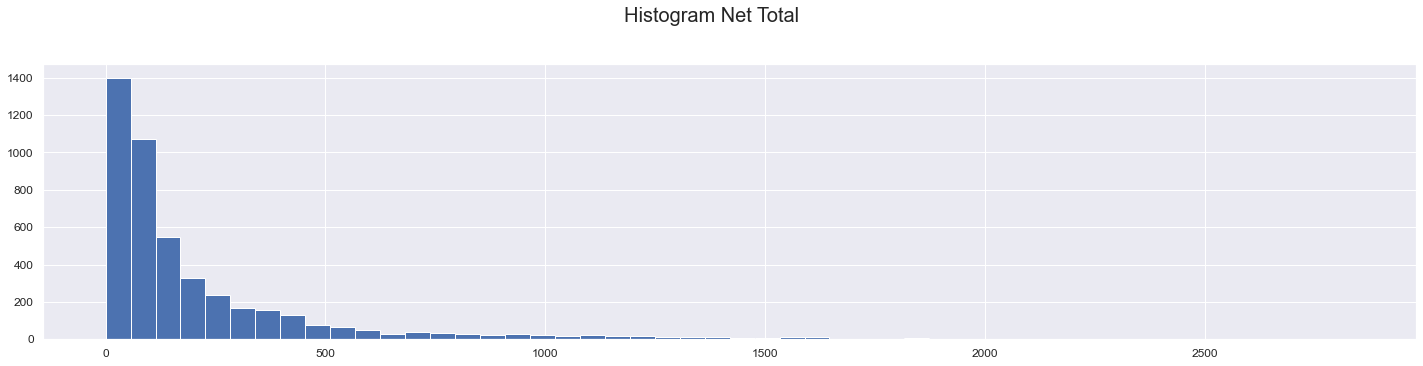

In [9]:
df3.netTotal.hist(bins=50, figsize=(20,5))
plt.suptitle('Histogram Net Total', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

In [10]:
df3.netTotal.describe()

count   4610.00
mean     220.02
std      306.44
min        0.00
25%       49.00
50%      103.00
75%      249.00
max     2839.00
Name: netTotal, dtype: float64

In [11]:
df3.netTotal.skew()

2.978982688499203

## Correlation

In [12]:
df3.corr()

,quantity,price,discounts,netTotal,purchaseNumber,daysSinceLastPurch,quantity_364,price_364,discounts_364,netTotal_364,quantity_28,price_28,discounts_28,netTotal_28,quantity_7,price_7,discounts_7,netTotal_7,engagement,posts
quantity,1.00,0.29,0.02,0.89,0.00,0.02,0.87,0.31,0.01,0.81,0.85,0.35,0.03,0.80,0.85,0.32,0.03,0.80,-0.01,-0.00
price,0.29,1.00,0.41,0.54,0.05,-0.09,0.30,0.69,0.20,0.51,0.30,0.76,0.24,0.52,0.31,0.71,0.20,0.52,0.01,0.00
discounts,0.02,0.41,1.00,0.08,0.01,0.01,0.00,0.17,0.08,0.07,0.02,0.20,0.10,0.08,0.02,0.20,0.10,0.08,0.00,0.01
netTotal,0.89,0.54,0.08,1.00,0.02,-0.01,0.82,0.53,0.09,0.91,0.80,0.58,0.12,0.90,0.79,0.54,0.09,0.90,-0.00,0.00
purchaseNumber,0.00,0.05,0.01,0.02,1.00,-0.29,0.01,0.06,0.03,0.02,0.01,0.07,0.04,0.03,-0.00,0.07,0.04,0.01,0.05,0.04
daysSinceLastPurch,0.02,-0.09,0.01,-0.01,-0.29,1.00,0.01,-0.06,-0.04,-0.01,0.03,-0.04,-0.01,-0.00,0.01,-0.04,-0.01,-0.01,0.01,-0.01
quantity_364,0.87,0.30,0.00,0.82,0.01,0.01,1.00,0.31,0.02,0.89,0.84,0.35,0.03,0.80,0.85,0.30,-0.00,0.80,0.02,0.03
price_364,0.31,0.69,0.17,0.53,0.06,-0.06,0.31,1.00,0.28,0.57,0.31,0.75,0.25,0.52,0.31,0.66,0.17,0.53,-0.01,-0.01
discounts_364,0.01,0.20,0.08,0.09,0.03,-0.04,0.02,0.28,1.00,0.07,0.01,0.22,0.10,0.08,0.00,0.20,0.08,0.08,-0.03,-0.04
netTotal_364,0.81,0.51,0.07,0.91,0.02,-0.01,0.89,0.57,0.07,1.00,0.79,0.58,0.12,0.89,0.80,0.51,0.07,0.90,0.02,0.02


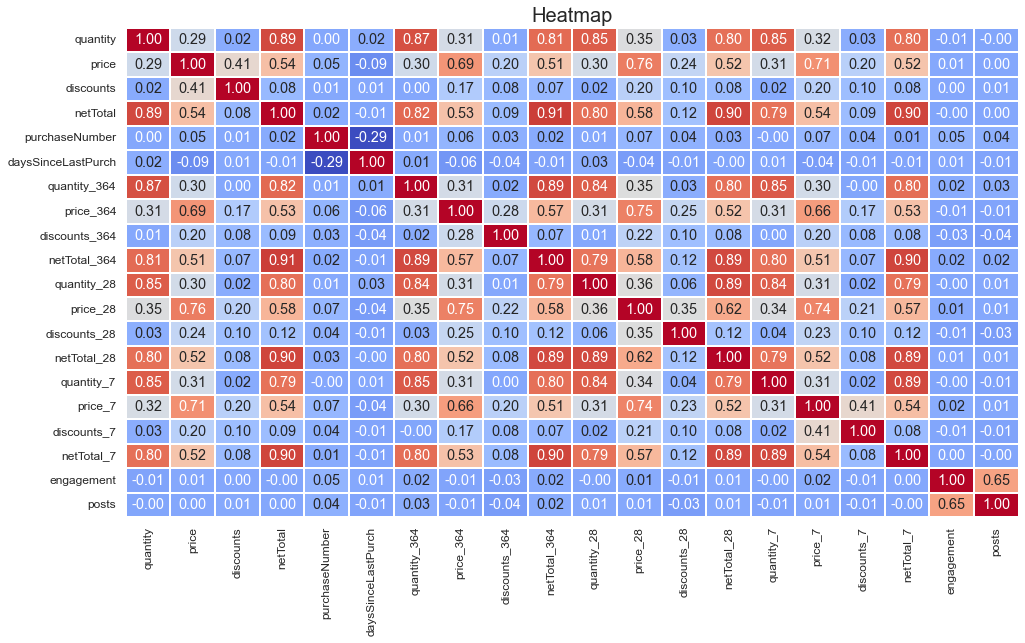

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.title("Heatmap", fontsize=20)
plt.show()

In [14]:
df3.columns

Index(['date', 'LineItem', 'quantity', 'price', 'discounts', 'netTotal', 'purchaseNumber', 'daysSinceLastPurch', 'quantity_364', 'price_364', 'discounts_364', 'netTotal_364', 'quantity_28', 'price_28', 'discounts_28', 'netTotal_28', 'quantity_7', 'price_7', 'discounts_7', 'netTotal_7', 'engagement', 'posts'], dtype='object')

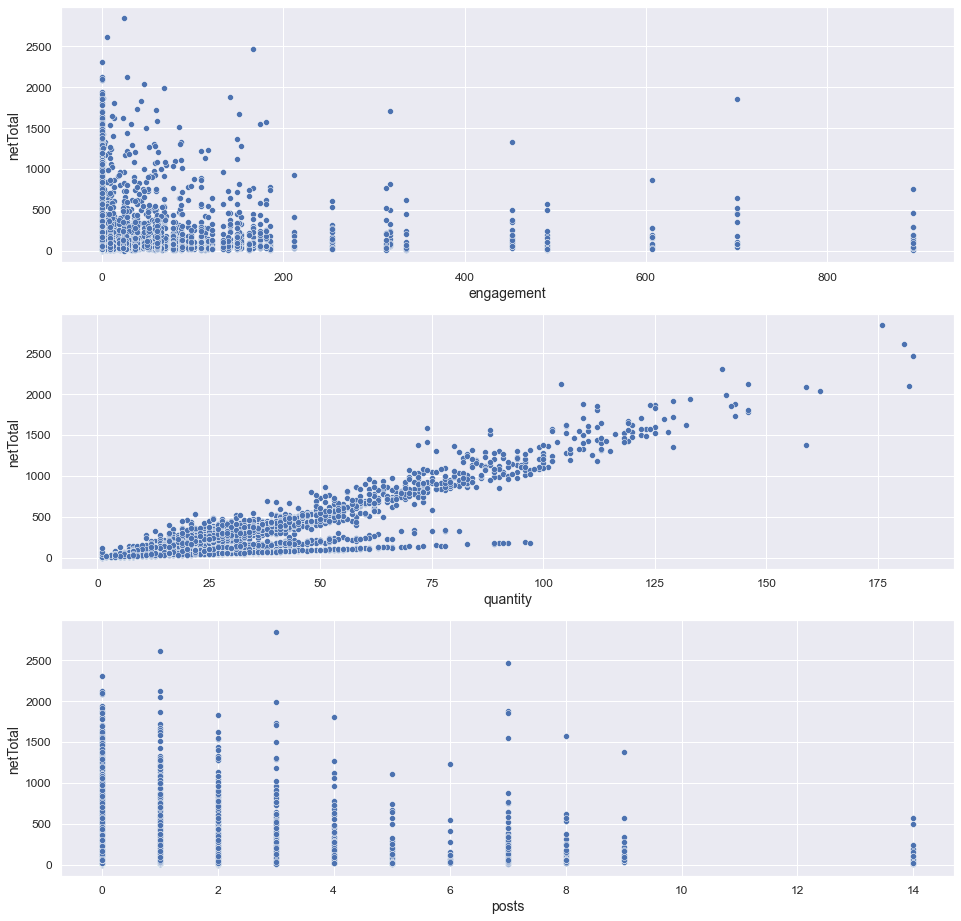

In [15]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(3,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.scatterplot(x="engagement", y="netTotal", data=df3, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)

sns.scatterplot(x="quantity", y="netTotal", data=df3, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)

sns.scatterplot(x="posts", y="netTotal", data=df3, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)



plt.show()

In [16]:
df3[['engagement','quantity','posts','netTotal']].corr()

,engagement,quantity,posts,netTotal
engagement,1.00,-0.01,0.65,-0.00
quantity,-0.01,1.00,-0.00,0.89
posts,0.65,-0.00,1.00,0.00
netTotal,-0.00,0.89,0.00,1.00


## Regression Analysis

### Linear Regression

In [17]:
df3.columns

Index(['date', 'LineItem', 'quantity', 'price', 'discounts', 'netTotal', 'purchaseNumber', 'daysSinceLastPurch', 'quantity_364', 'price_364', 'discounts_364', 'netTotal_364', 'quantity_28', 'price_28', 'discounts_28', 'netTotal_28', 'quantity_7', 'price_7', 'discounts_7', 'netTotal_7', 'engagement', 'posts'], dtype='object')

In [18]:
df4 = df3[['quantity', 'price', 'discounts','engagement', 'posts', 'netTotal']]

In [19]:
df4.columns

Index(['quantity', 'price', 'discounts', 'engagement', 'posts', 'netTotal'], dtype='object')

In [20]:
X = df4['quantity']

In [21]:
y = df4['netTotal']

In [22]:
X = sm.add_constant(X)

In [23]:
est = sm.OLS(y,X).fit()

In [24]:
X = df4['price']

In [25]:
y = df4['netTotal']

In [26]:
X = sm.add_constant(X)

In [27]:
est2 = sm.OLS(y,X).fit()

In [28]:
X = df4['discounts']

In [29]:
y = df4['netTotal']

In [30]:
X = sm.add_constant(X)

In [31]:
est3 = sm.OLS(y,X).fit()

In [32]:
stargazer = Stargazer([est,est2,est3])

In [33]:
stargazer

In [35]:
linreg = smf.ols(formula='netTotal ~ quantity + price + discounts', data=df4).fit()

In [38]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               netTotal   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.223e+04
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:47:28   Log-Likelihood:                -27878.
No. Observations:                4610   AIC:                         5.576e+04
Df Residuals:                    4606   BIC:                         5.579e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -203.0569      2.860    -71.008      0.000    -208.663    -197.451
quantity      10.6081      0.069    153.972      0.000      10.473      10.743
price         21.0971      0.353     59.820      0.000      20.406      21.789
discounts    -22.5750      1.620    -13.934      0.000     -25.751     -19.399
==============================================================================
Omnibus:                     3674.312   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           575777.880
Skew:                          -3.006   Prob(JB):                         0.00
Kurtosis:                      57.419   Cond. No.                         68.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Python code done by Dennis Lam